<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/05_transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan 18 13:39:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvidia-smi

Sat Jan 18 13:39:55 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!wget https://github.com/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/extras/helper_functions.py

--2025-01-18 13:39:55--  https://github.com/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/extras/helper_functions.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘helper_functions.py’

helper_functions.py     [ <=>                ] 290.14K  --.-KB/s    in 0.01s   

2025-01-18 13:39:56 (21.4 MB/s) - ‘helper_functions.py’ saved [297108]



In [5]:
from helper_functions import pred_and_plot, plot_loss_curves, unzip_folder, walk_through_directory, view_random_image

### Downloading the dataset

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_folder("10_food_classes_10_percent.zip")

--2025-01-18 13:40:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.5MB/s    in 8.2s    

2025-01-18 13:40:31 (19.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
walk_through_directory('/content/10_food_classes_10_percent')

2 directories and 0 files in /content/10_food_classes_10_percent
10 directories and 0 files in /content/10_food_classes_10_percent/test
0 directories and 250 files in /content/10_food_classes_10_percent/test/ice_cream
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_wings
0 directories and 250 files in /content/10_food_classes_10_percent/test/sushi
0 directories and 250 files in /content/10_food_classes_10_percent/test/hamburger
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_curry
0 directories and 250 files in /content/10_food_classes_10_percent/test/grilled_salmon
0 directories and 250 files in /content/10_food_classes_10_percent/test/fried_rice
0 directories and 250 files in /content/10_food_classes_10_percent/test/steak
0 directories and 250 files in /content/10_food_classes_10_percent/test/pizza
0 directories and 250 files in /content/10_food_classes_10_percent/test/ramen
10 directories and 0 files in /content/10_food

In [8]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

#### Input Data Pipelines
**using tf.keras.preprocessing.image_dataset_from_directory() -> creates tf.data.Dataset object, explore [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)**

In [9]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE= 32
IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         batch_size=BATCH_SIZE,
                                                                         image_size=IMAGE_SIZE,
                                                                         shuffle=True,
                                                                         label_mode='categorical' # one hot encoded
                                                                         )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             batch_size=BATCH_SIZE,
                                                             image_size = IMAGE_SIZE,
                                                             shuffle=True,
                                                             label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
# see a batch of Data

for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[184.2143     170.2143     161.2143    ]
   [185.30612    170.30612    163.30612   ]
   [181.30612    166.30612    160.87755   ]
   ...
   [110.58163     94.857155    69.71939   ]
   [107.903015    95.70918     69.73469   ]
   [104.78573     95.77041     70.4847    ]]

  [[189.2653     172.2653     165.2653    ]
   [184.07652    166.07652    162.07652   ]
   [182.57143    164.57143    162.14285   ]
   ...
   [103.913246    96.586716    70.714264  ]
   [ 99.49995     93.34691     67.352005  ]
   [ 99.21429     96.862236    69.33672   ]]

  [[189.36224    172.14796    161.71939   ]
   [188.5        171.2857     162.91325   ]
   [189.40306    171.40306    166.11736   ]
   ...
   [ 87.54589     83.806114    59.403053  ]
   [ 83.49996     83.35714     57.45916   ]
   [ 81.50511     83.43367     55.78062   ]]

  ...

  [[187.07652    177.07652    141.29079   ]
   [188.0153     178.0153     142.22957   ]
   [188.83163    178.83163    143.66325   ]
   ...
   [206.99997    194.999

### Creating model with `tf.keras.applications`

In [13]:
# from tf.keras.applications import MobileV3Small

base_model = tf.keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=IMAGE_SIZE+(3,),
    include_top=False,
    include_preprocessing = True
)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = 'input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) #returns (batch_size, channels)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x) # trains on batch_size requires (batch_size, features)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(x = train_data_10_percent,
                        validation_data=test_data,
                        epochs=5)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 773ms/step - accuracy: 0.1050 - loss: 2.4974 - val_accuracy: 0.3304 - val_loss: 1.8835
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.4311 - loss: 1.7392 - val_accuracy: 0.5668 - val_loss: 1.4385
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.6028 - loss: 1.3502 - val_accuracy: 0.6692 - val_loss: 1.1797
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.7088 - loss: 1.0737 - val_accuracy: 0.7096 - val_loss: 1.0329
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.7241 - loss: 0.9475 - val_accuracy: 0.7360 - val_loss: 0.9404


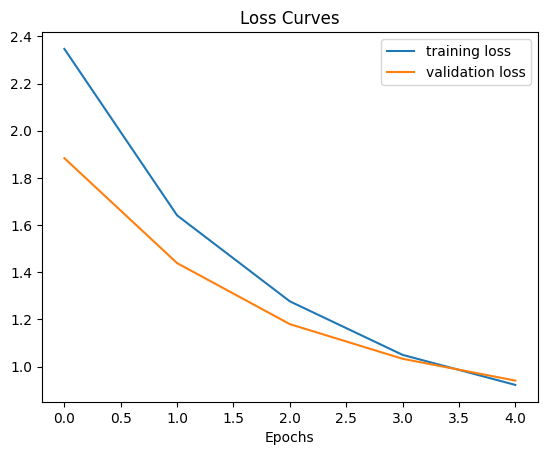

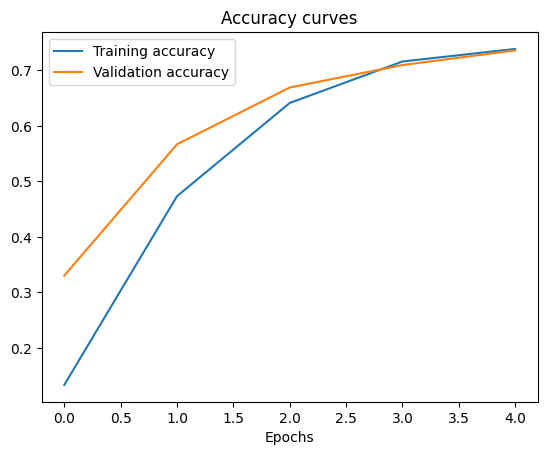

In [14]:
plot_loss_curves(history_0)

In [15]:
# checking out layers in model

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer
1 rescaling
2 conv
3 conv_bn
4 activation
5 expanded_conv_depthwise_pad
6 expanded_conv_depthwise
7 expanded_conv_depthwise_bn
8 re_lu
9 expanded_conv_squeeze_excite_avg_pool
10 expanded_conv_squeeze_excite_conv
11 expanded_conv_squeeze_excite_relu
12 expanded_conv_squeeze_excite_conv_1
13 re_lu_1
14 expanded_conv_squeeze_excite_mul
15 expanded_conv_project
16 expanded_conv_project_bn
17 expanded_conv_1_expand
18 expanded_conv_1_expand_bn
19 re_lu_2
20 expanded_conv_1_depthwise_pad
21 expanded_conv_1_depthwise
22 expanded_conv_1_depthwise_bn
23 re_lu_3
24 expanded_conv_1_project
25 expanded_conv_1_project_bn
26 expanded_conv_2_expand
27 expanded_conv_2_expand_bn
28 re_lu_4
29 expanded_conv_2_depthwise
30 expanded_conv_2_depthwise_bn
31 re_lu_5
32 expanded_conv_2_project
33 expanded_conv_2_project_bn
34 expanded_conv_2_add
35 expanded_conv_3_expand
36 expanded_conv_3_expand_bn
37 activation_1
38 expanded_conv_3_depthwise_pad
39 expanded_conv_3_depthwise
40 expanded_conv_3_

In [16]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name)

0 input_layer
1 MobileNetV3Small
2 global_average_pooling_layer
3 output_layer


In [17]:
base_model.summary() #trained mobile net whose layers are frozen

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [18]:
model_0.summary() # only weights, baises in last layer can be modified

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

### Training other models

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_folder('10_food_classes_1_percent.zip')

--2025-01-18 13:41:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.9MB/s    in 6.9s    

2025-01-18 13:41:54 (18.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
train_dir_1_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_1_percent/test'


In [21]:
walk_through_directory('10_food_classes_1_percent')

2 directories and 0 files in 10_food_classes_1_percent
10 directories and 0 files in 10_food_classes_1_percent/test
0 directories and 250 files in 10_food_classes_1_percent/test/ice_cream
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_wings
0 directories and 250 files in 10_food_classes_1_percent/test/sushi
0 directories and 250 files in 10_food_classes_1_percent/test/hamburger
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_curry
0 directories and 250 files in 10_food_classes_1_percent/test/grilled_salmon
0 directories and 250 files in 10_food_classes_1_percent/test/fried_rice
0 directories and 250 files in 10_food_classes_1_percent/test/steak
0 directories and 250 files in 10_food_classes_1_percent/test/pizza
0 directories and 250 files in 10_food_classes_1_percent/test/ramen
10 directories and 0 files in 10_food_classes_1_percent/train
0 directories and 7 files in 10_food_classes_1_percent/train/ice_cream
0 directories and 7 files in 10_f

In [22]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,

                                                                           label_mode ='categorical',
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE,
                                                                image_size=IMAGE_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
### Adding data augmentaion directly into the model
from tensorflow.keras import layers

# generates 1 augmented Image per input image
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Resize to specific dimensions
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
], name= 'data_augmentationn')

image path: 10_food_classes_10_percent/train/hamburger/1038553.jpg


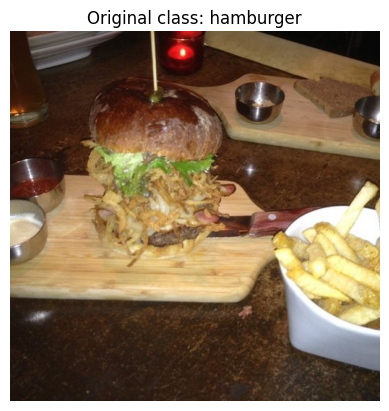

In [25]:
view_random_image(train_data_10_percent.class_names, train_dir_1_percent)

(-0.5, 250.5, 260.5, -0.5)

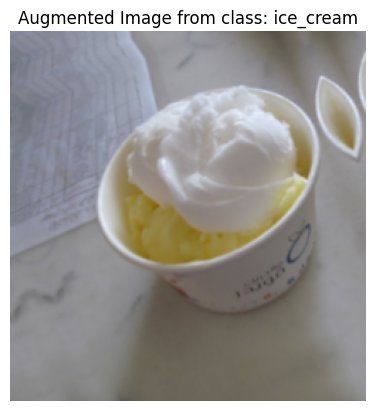

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('10_food_classes_10_percent/train/ice_cream/3685309.jpg')
augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
# plt.imshow(tf.squeeze(augmented_image)/255.)
augmented_image = tf.cast(tf.squeeze(augmented_image), dtype=tf.uint8)
plt.imshow(augmented_image)
plt.title('Augmented Image from class: ice_cream')
# plt.title(f"Augme")
plt.axis('Off')

In [27]:
print(augmented_image)

tf.Tensor(
[[[135 139 156]
  [134 139 158]
  [135 139 159]
  ...
  [143 142 145]
  [145 144 147]
  [147 146 151]]

 [[133 138 157]
  [134 139 159]
  [133 138 158]
  ...
  [142 142 147]
  [145 144 149]
  [146 145 151]]

 [[131 136 155]
  [132 137 157]
  [131 136 155]
  ...
  [142 141 148]
  [144 143 149]
  [145 144 151]]

 ...

 [[131 131 130]
  [131 131 130]
  [131 131 130]
  ...
  [140 140 141]
  [142 142 144]
  [143 143 144]]

 [[130 130 129]
  [130 130 129]
  [131 131 129]
  ...
  [139 139 139]
  [141 141 142]
  [142 142 143]]

 [[129 129 128]
  [130 130 129]
  [130 130 129]
  ...
  [138 138 137]
  [139 139 138]
  [141 141 141]]], shape=(261, 251, 3), dtype=uint8)


### Model 1: Feature extraction using transfer learning on 1% of data + data augmentation

In [28]:
# def preprocess(image, label):
#     image = tf.image.resize(image, [224, 224])  # Resize image to required shape
#     image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
#     return image, label

# train_data_1_percent = train_data_1_percent.map(preprocess).batch(32)
# test_data = test_data.map(preprocess).batch(32)


In [29]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV3Small(include_top=False)#normalizes the image values

base_model.trainable=False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B
] ,name="data_augmentation" )



inputs = layers.Input(shape=input_shape, name='input_layer')

# adds in data augmentation as a layer
x = data_augmentation(inputs)
print(f"Shape of x is: {x.shape}")
# inputs after data augmentation, and freeze base model weights
x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name='global_average_poooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x) # 10 -> 10 categories in our data

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        validation_data=test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Shape of x is: (None, None, None, 3)
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 944ms/step - accuracy: 0.1414 - loss: 2.4897 - val_accuracy: 0.2696 - val_loss: 2.0369
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 497ms/step - accuracy: 0.2986 - loss: 1.9550 - val_accuracy: 0.4976 - val_loss: 1.6149
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 434ms/step - accuracy: 0.4847 - loss: 1.6455 - val_accuracy: 0.6080 - val_loss: 1.3590
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.5442 - loss: 1.4474 - val_accuracy: 0.6584 - val_loss: 1.1982
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - accuracy: 0.6215 - loss: 1.3163 - val_accuracy: 0.6852 - val_loss: 1.0852


In [30]:
inputs

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>